# Abstract

Machine learning models are a viable tool in understanding trends and making predictions about future events. In this project, classification models were analyzed in the context of predicting client subscription to term deposits using the "Bank Marketing" dataset. Term deposit subscription is influenced by several factors, such as last contact duration and age. PyCaret's classification module was used for preprocessing, model selection, and evaluation. Out of all the models that were tested, Light Gradient Boosting Machine (LightGBM) achieved the best performance, with an accuracy of 91%. This study demonstrates how machine learning model selection and evaluation is an appropriate approach for optimizing predictions for marketing analytics, providing insights for practical applications in similar circumstances.

In [3]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip -q bank-additional.zip

# 1. Setup

In [5]:
# Load bank-additional-full.csv dataset
import pandas as pd
data = pd.read_csv('bank-additional/bank-additional-full.csv', sep=";")
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'y', session_id = 123)

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(41188, 21)"
5,Transformed data shape,"(41188, 63)"
6,Transformed train set shape,"(28831, 63)"
7,Transformed test set shape,"(12357, 63)"
8,Numeric features,10
9,Categorical features,10


# 2. Compare Models

In [7]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9161,0.9494,0.9161,0.9111,0.9130,0.5500,0.5526,3.0790
gbc,Gradient Boosting Classifier,0.9157,0.9464,0.9157,0.9091,0.9113,0.5360,0.5407,5.8710
catboost,CatBoost Classifier,0.9145,0.9488,0.9145,0.9087,0.9108,0.5364,0.5398,15.2350
rf,Random Forest Classifier,0.9123,0.9388,0.9123,0.9025,0.9046,0.4886,0.5004,3.9900
xgboost,Extreme Gradient Boosting,0.9113,0.9442,0.9113,0.9063,0.9083,0.5268,0.5291,1.4550
lr,Logistic Regression,0.9100,0.9319,0.9100,0.8989,0.9007,0.4621,0.4778,5.9620
ada,Ada Boost Classifier,0.9095,0.9363,0.9095,0.8978,0.8997,0.4549,0.4716,2.0270
lda,Linear Discriminant Analysis,0.9090,0.9331,0.9090,0.9024,0.9049,0.5048,0.5083,0.8030
ridge,Ridge Classifier,0.9070,0.9331,0.9070,0.8931,0.8920,0.3975,0.4300,0.9540
knn,K Neighbors Classifier,0.9025,0.8725,0.9025,0.8954,0.8982,0.4706,0.4738,2.2150


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [27]:
best_models_top3 = compare_models(sort = 'Accuracy', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9161,0.9494,0.9161,0.9111,0.9130,0.5500,0.5526,4.2450
gbc,Gradient Boosting Classifier,0.9157,0.9464,0.9157,0.9091,0.9113,0.5360,0.5407,6.0650
catboost,CatBoost Classifier,0.9145,0.9488,0.9145,0.9087,0.9108,0.5364,0.5398,15.3340
rf,Random Forest Classifier,0.9123,0.9388,0.9123,0.9025,0.9046,0.4886,0.5004,3.6440
xgboost,Extreme Gradient Boosting,0.9113,0.9442,0.9113,0.9063,0.9083,0.5268,0.5291,1.5330
lr,Logistic Regression,0.9100,0.9319,0.9100,0.8989,0.9007,0.4621,0.4778,4.8810
ada,Ada Boost Classifier,0.9095,0.9363,0.9095,0.8978,0.8997,0.4549,0.4716,1.9860
lda,Linear Discriminant Analysis,0.9090,0.9331,0.9090,0.9024,0.9049,0.5048,0.5083,0.8990
ridge,Ridge Classifier,0.9070,0.9331,0.9070,0.8931,0.8920,0.3975,0.4300,0.6230
knn,K Neighbors Classifier,0.9025,0.8725,0.9025,0.8954,0.8982,0.4706,0.4738,2.2060


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [29]:
# list of top 3 models by Accuracy
best_models_top3

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=123, subsample=1.0, tol=0.0001,
                           

# 3. Create Models

## Light Gradient Boosting Machine

In [12]:
# train lightgbm with default fold=10
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9161,0.9451,0.9161,0.9103,0.9124,0.5450,0.5482
1,0.9292,0.9626,0.9292,0.9253,0.9267,0.6208,0.6233
2,0.9188,0.9534,0.9188,0.9143,0.9161,0.5663,0.5683
3,0.9133,0.9500,0.9133,0.9071,0.9094,0.5285,0.5319
4,0.9112,0.9431,0.9112,0.9074,0.9090,0.5349,0.5359
5,0.9195,0.9482,0.9195,0.9131,0.9151,0.5547,0.5600
6,0.9195,0.9512,0.9195,0.9159,0.9175,0.5773,0.5785
7,0.9088,0.9458,0.9088,0.9034,0.9056,0.5133,0.5152
8,0.9081,0.9458,0.9081,0.9029,0.9051,0.5110,0.5127


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Tuned Light Gradient Boosting Machine

In [24]:
# tune hyperparameters of lightgbm
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9171,0.9450,0.9171,0.9103,0.9125,0.5406,0.5460
1,0.9289,0.9604,0.9289,0.9239,0.9253,0.6082,0.6133
2,0.9213,0.9532,0.9213,0.9170,0.9187,0.5799,0.5819
3,0.9136,0.9481,0.9136,0.9075,0.9098,0.5311,0.5344
4,0.9136,0.9427,0.9136,0.9086,0.9107,0.5392,0.5412
5,0.9206,0.9506,0.9206,0.9131,0.9146,0.5463,0.5558
6,0.9188,0.9486,0.9188,0.9148,0.9165,0.5712,0.5728
7,0.9119,0.9451,0.9119,0.9065,0.9087,0.5279,0.5302
8,0.9129,0.9471,0.9129,0.9069,0.9092,0.5287,0.5318


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Ensemble Light Gradient Boosting Machine

## Ensemble with Bagging

In [37]:
# ensemble with bagging
ensemble_model_bagging = ensemble_model(lightgbm, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9171,0.9451,0.9171,0.9109,0.9130,0.5460,0.5502
1,0.9306,0.9626,0.9306,0.9259,0.9273,0.6195,0.6241
2,0.9230,0.9553,0.9230,0.9194,0.9209,0.5932,0.5946
3,0.9122,0.9507,0.9122,0.9058,0.9082,0.5222,0.5257
4,0.9119,0.9436,0.9119,0.9069,0.9089,0.5306,0.5325
5,0.9192,0.9496,0.9192,0.9124,0.9144,0.5494,0.5556
6,0.9171,0.9508,0.9171,0.9137,0.9151,0.5664,0.5674
7,0.9136,0.9467,0.9136,0.9081,0.9102,0.5352,0.5378
8,0.9126,0.9473,0.9126,0.9068,0.9091,0.5289,0.5316


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

## Ensemble with Boosting

In [38]:
# ensemble with boosting
ensemble_model_boosting = ensemble_model(lightgbm, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9078,0.9396,0.9078,0.9040,0.9057,0.5181,0.5190
1,0.9216,0.9555,0.9216,0.9171,0.9188,0.5799,0.5822
2,0.9143,0.9478,0.9143,0.9126,0.9134,0.5617,0.5619
3,0.9095,0.9439,0.9095,0.9033,0.9058,0.5114,0.5141
4,0.9088,0.9374,0.9088,0.9051,0.9068,0.5242,0.5250
5,0.9102,0.9433,0.9102,0.9037,0.9062,0.5123,0.5155
6,0.9119,0.9450,0.9119,0.9103,0.9110,0.5511,0.5513
7,0.9043,0.9416,0.9043,0.8965,0.8995,0.4749,0.4787
8,0.9032,0.9383,0.9032,0.8977,0.9000,0.4851,0.4868


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

## Blend Top 3 Models

In [39]:
# blend top 3 models
blend_models = blend_models(best_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9182,0.9461,0.9182,0.9120,0.9141,0.5510,0.5554
1,0.9258,0.9623,0.9258,0.9205,0.9222,0.5928,0.5973
2,0.9209,0.9544,0.9209,0.9167,0.9184,0.5786,0.5805
3,0.9109,0.9501,0.9109,0.9037,0.9063,0.5103,0.5145
4,0.9102,0.9436,0.9102,0.9043,0.9066,0.5165,0.5190
5,0.9220,0.9528,0.9220,0.9152,0.9169,0.5609,0.5684
6,0.9202,0.9516,0.9202,0.9167,0.9182,0.5809,0.5822
7,0.9116,0.9467,0.9116,0.9060,0.9082,0.5253,0.5277
8,0.9109,0.9469,0.9109,0.9047,0.9071,0.5174,0.5204


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

## Stack Top 3 Models

In [40]:
# stack top 3 models
stack_models = stack_models(best_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9175,0.9462,0.9175,0.9103,0.9125,0.5391,0.5453
1,0.9258,0.9626,0.9258,0.9201,0.9216,0.5880,0.5937
2,0.9209,0.9543,0.9209,0.9162,0.9180,0.5750,0.5775
3,0.9122,0.9502,0.9122,0.9043,0.9068,0.5092,0.5153
4,0.9109,0.9438,0.9109,0.9039,0.9065,0.5118,0.5157
5,0.9209,0.9525,0.9209,0.9134,0.9148,0.5462,0.5564
6,0.9178,0.9517,0.9178,0.9126,0.9146,0.5576,0.5603
7,0.9129,0.9466,0.9129,0.9062,0.9086,0.5232,0.5272
8,0.9133,0.9468,0.9133,0.9064,0.9088,0.5230,0.5274


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

# 4. Analyze Models

## Light Gradient Boosting Machine

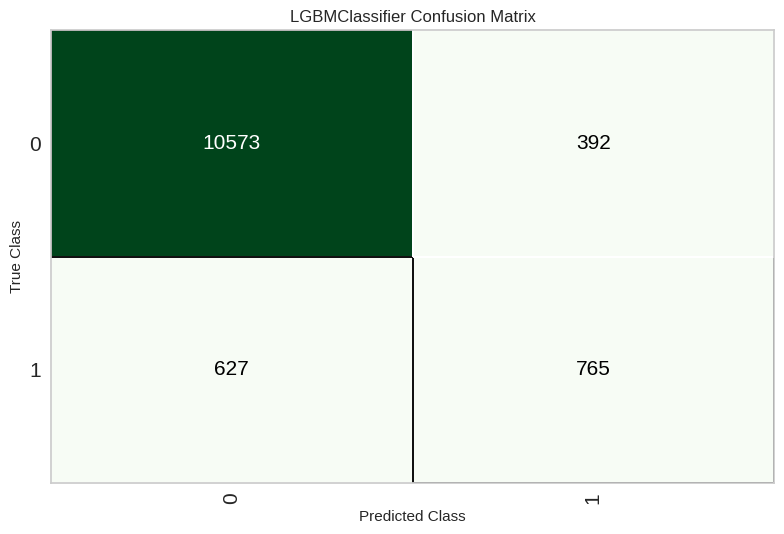

In [41]:
plot_model(lightgbm, plot = 'confusion_matrix')

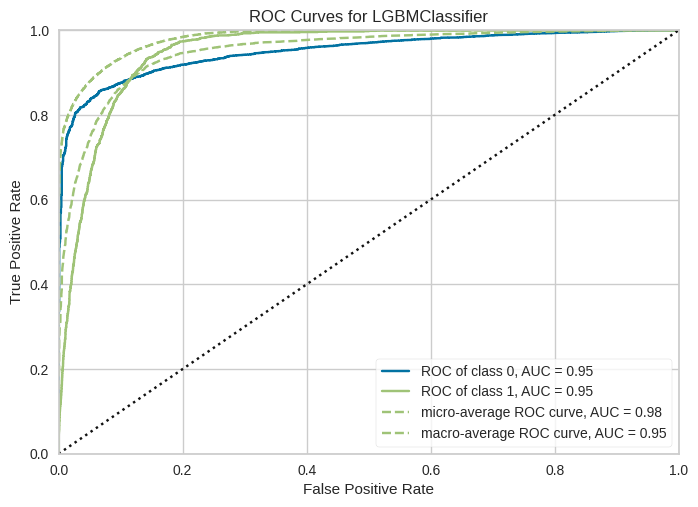

In [47]:
plot_model(lightgbm, plot = 'auc')

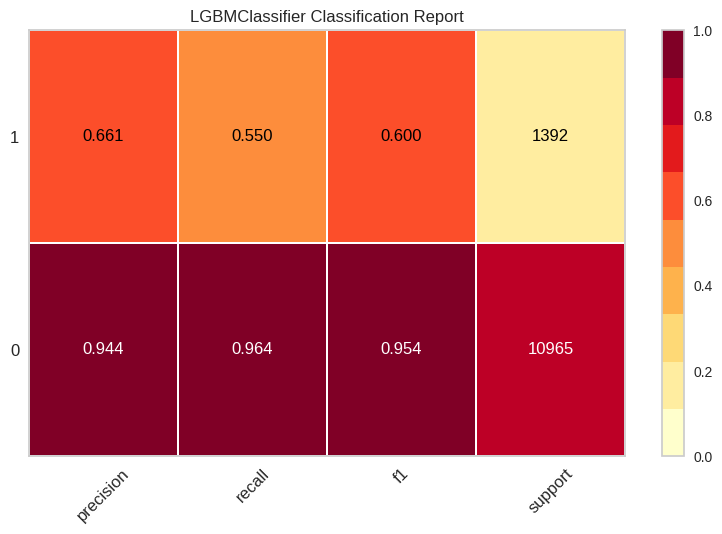

In [53]:
plot_model(lightgbm, plot = 'class_report')

## Tuned Light Gradient Boosting Machine

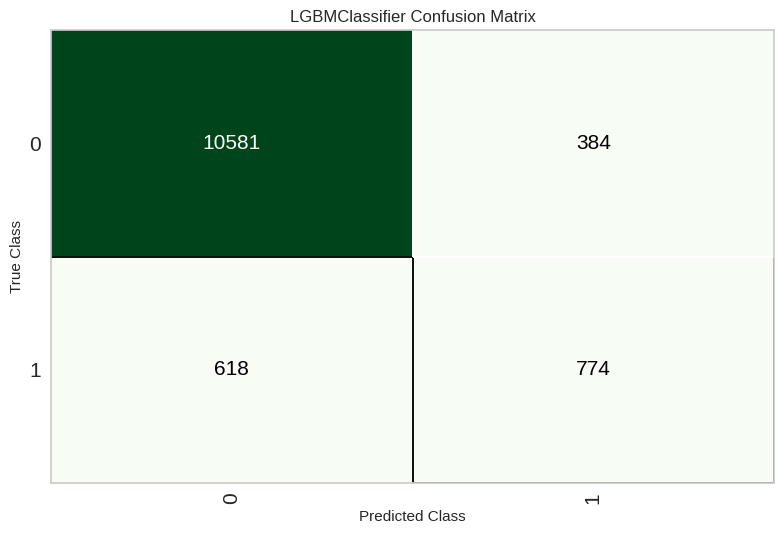

In [42]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

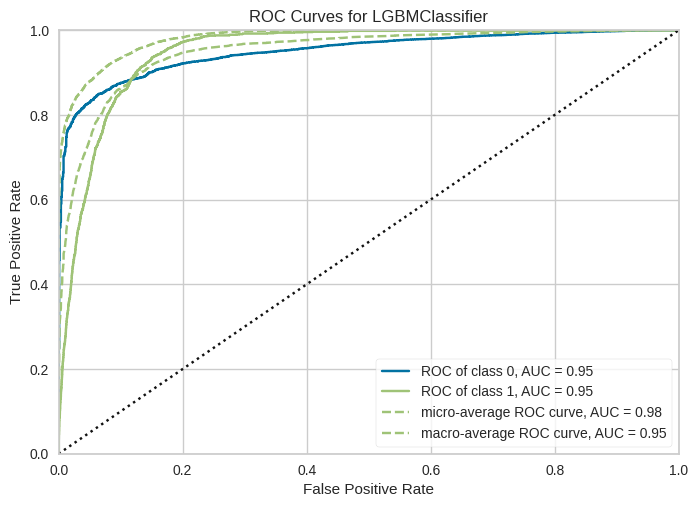

In [48]:
plot_model(tuned_lightgbm, plot = 'auc')

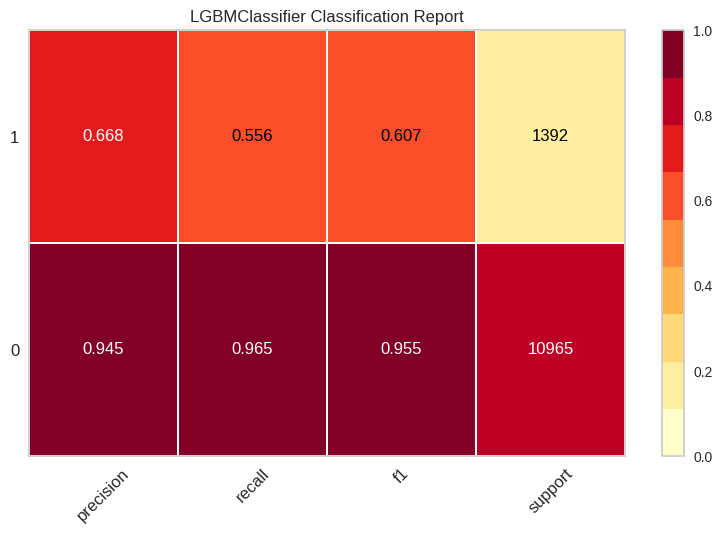

In [54]:
plot_model(tuned_lightgbm, plot = 'class_report')

## Ensemble Gradient Boosting Machine

### Ensemble with Bagging

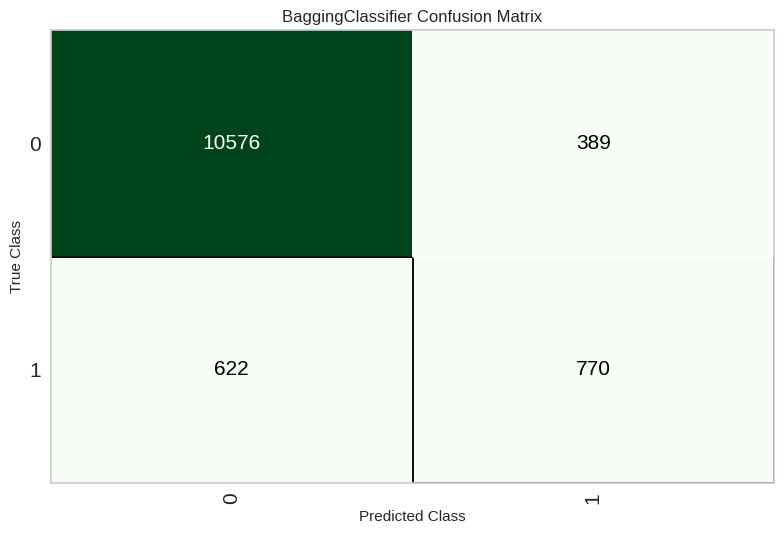

In [43]:
plot_model(ensemble_model_bagging, plot = 'confusion_matrix')

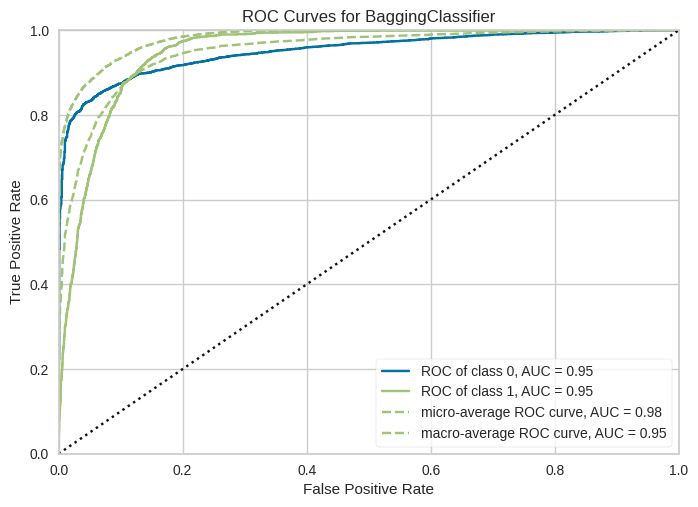

In [49]:
plot_model(ensemble_model_bagging, plot = 'auc')

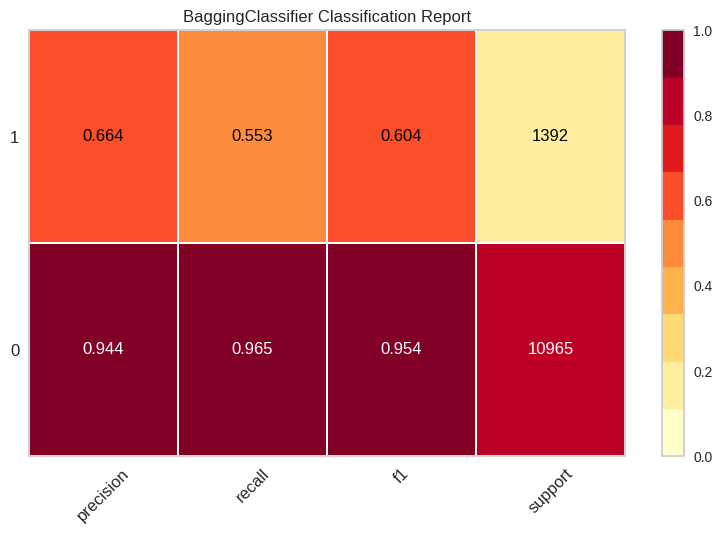

In [55]:
plot_model(ensemble_model_bagging, plot = 'class_report')

### Ensemble with Boosting

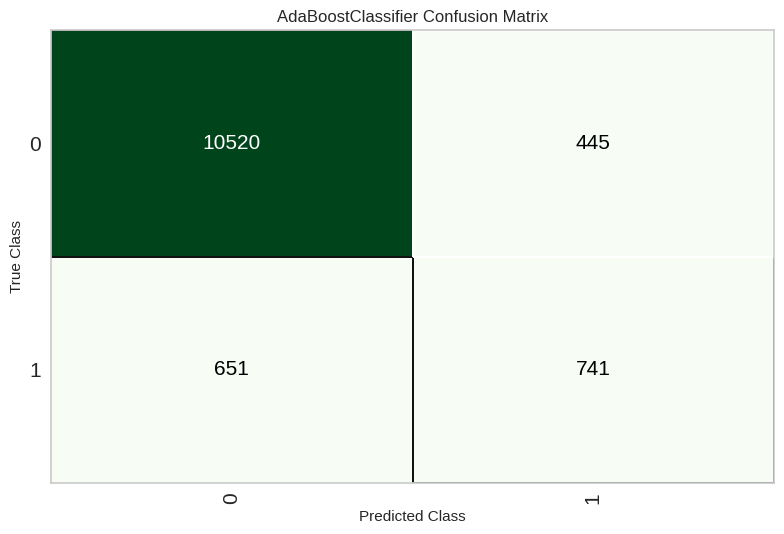

In [44]:
plot_model(ensemble_model_boosting, plot = 'confusion_matrix')

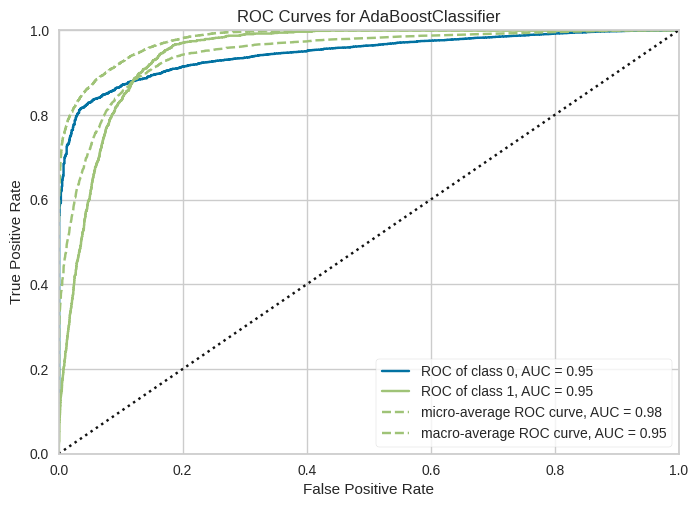

In [50]:
plot_model(ensemble_model_boosting, plot = 'auc')

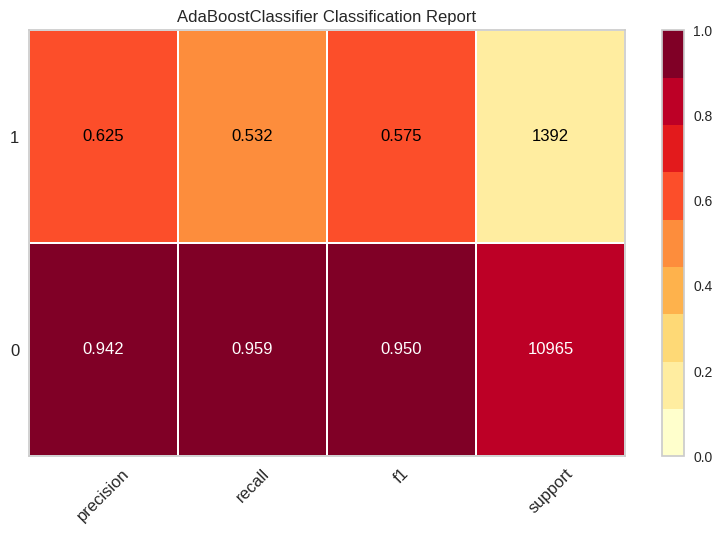

In [56]:
plot_model(ensemble_model_boosting, plot = 'class_report')

## Blend Top 3 Models

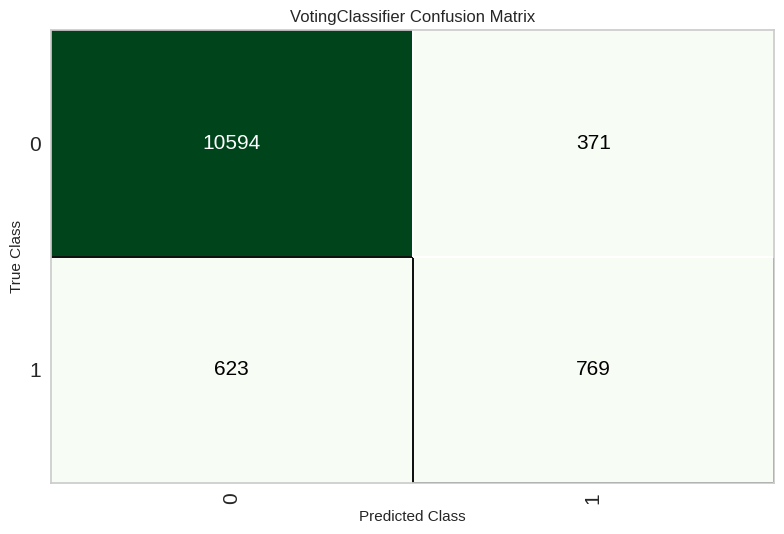

In [45]:
plot_model(blend_models, plot = 'confusion_matrix')

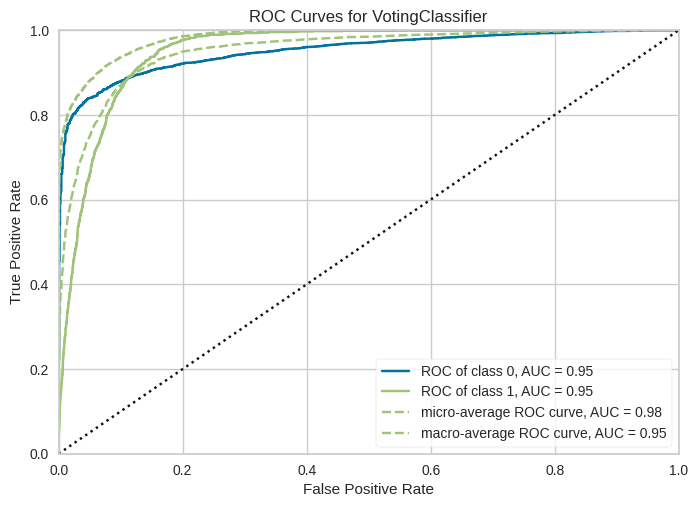

In [51]:
plot_model(blend_models, plot = 'auc')

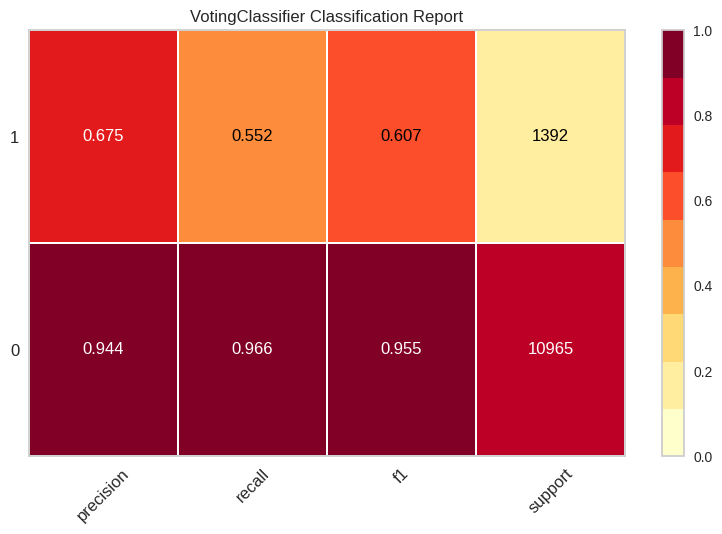

In [57]:
plot_model(blend_models, plot = 'class_report')

## Stack Top 3 Models

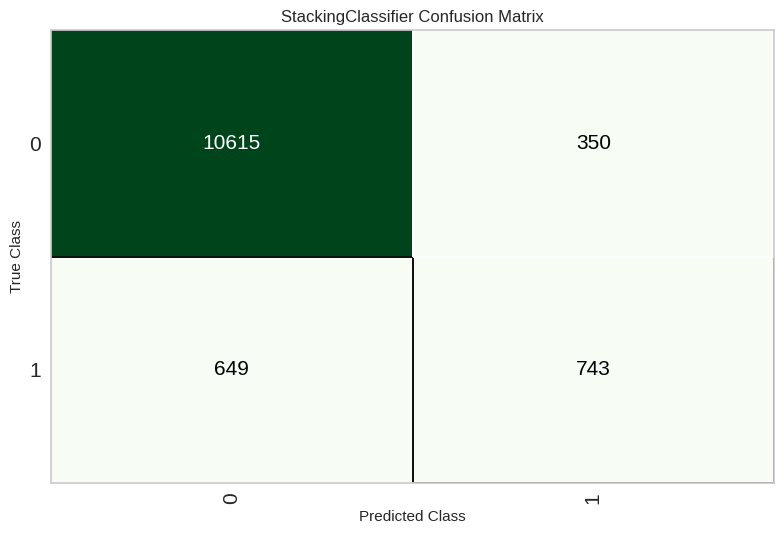

In [46]:
plot_model(stack_models, plot = 'confusion_matrix')

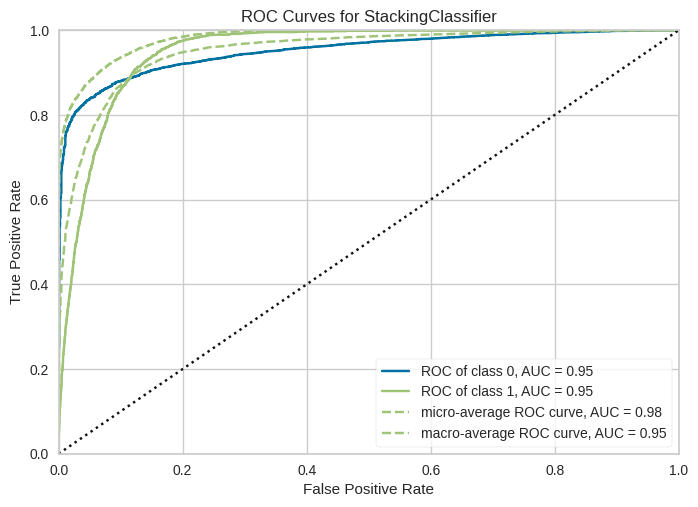

In [52]:
plot_model(stack_models, plot = 'auc')

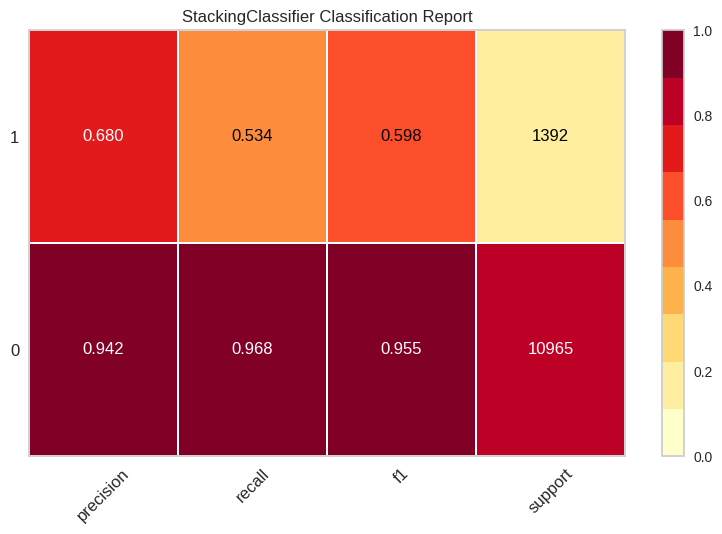

In [58]:
plot_model(stack_models, plot = 'class_report')

## Get Leaderboard

In [59]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/47 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapperWithInverse(exclude=None, i...",0.9100,0.9319,0.9100,0.8989,0.9007,0.4621,0.4778
1,K Neighbors Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9025,0.8725,0.9025,0.8954,0.8982,0.4706,0.4738
2,Naive Bayes,"(TransformerWrapperWithInverse(exclude=None, i...",0.8646,0.8313,0.8646,0.8776,0.8704,0.3829,0.3854
3,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.8896,0.7292,0.8896,0.8909,0.8902,0.4537,0.4539
4,SVM - Linear Kernel,"(TransformerWrapperWithInverse(exclude=None, i...",0.8946,0.9127,0.8946,0.8919,0.8804,0.3554,0.4002
5,Ridge Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9070,0.9331,0.9070,0.8931,0.8920,0.3975,0.4300
6,Random Forest Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9123,0.9388,0.9123,0.9025,0.9046,0.4886,0.5004
7,Quadratic Discriminant Analysis,"(TransformerWrapperWithInverse(exclude=None, i...",0.5384,0.8710,0.5384,0.9011,0.6062,0.1697,0.2876
8,Ada Boost Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9095,0.9363,0.9095,0.8978,0.8997,0.4549,0.4716


In [60]:
# select the best model based on F1
lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'duration', 'campaign',
                                             'pdays', 'previous',
                                             'emp.var.rate', 'cons.price.idx',
                                             'cons.conf.idx', 'euribor3m',
                                             'nr.employed'],
                                    transformer=Simple...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.9,
                                importance_type='split', learning_rate=0.05,
                                max_depth=-1, min_child_samples=96,
                                min_child_weight=0.001, min_split_gain=0.7,
                                n_estimators=180, n_jobs=-1, num_leaves=10,
                                objective=None, random_state=123,
                                reg_alpha=0.0001, reg_lambda=0.1, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0)]],
         verbose=False)

## AutoML

In [61]:
automl()

LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Feature Importance

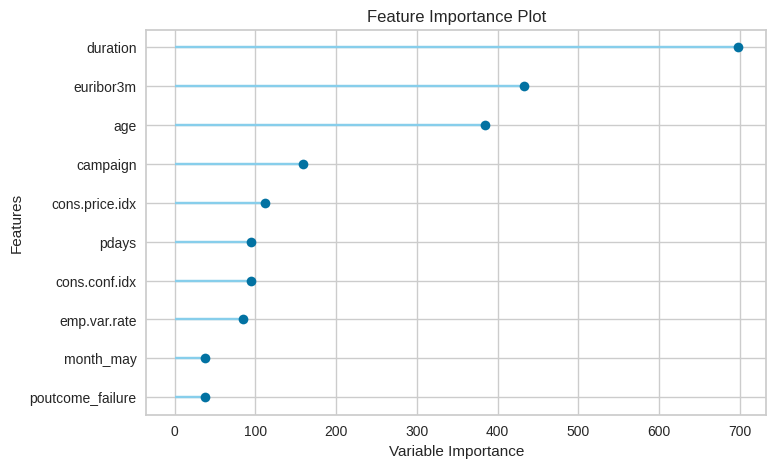

In [77]:
plot_model(best, plot = 'feature')

# 5. Predictions

In [66]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9175,0.9499,0.9175,0.9122,0.9142,0.5547,0.5576


In [67]:
# show predictions df
holdout_pred.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,prediction_label,prediction_score
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,...,1,failure,-2.9,92.200996,-31.400000,0.869,5076.200195,yes,yes,0.6360
3357,25,blue-collar,single,basic.9y,unknown,yes,no,telephone,may,thu,...,0,nonexistent,1.1,93.994003,-36.400002,4.860,5191.000000,no,no,0.9993
22463,29,admin.,single,university.degree,no,yes,yes,cellular,aug,fri,...,0,nonexistent,1.4,93.444000,-36.099998,4.964,5228.100098,no,no,0.9999
15890,29,admin.,single,university.degree,no,no,yes,telephone,jul,mon,...,0,nonexistent,1.4,93.917999,-42.700001,4.960,5228.100098,yes,yes,0.5320
11725,33,admin.,married,professional.course,no,no,no,telephone,jun,fri,...,0,nonexistent,1.4,94.464996,-41.799999,4.959,5228.100098,no,no,0.9997


In [85]:
new_data = data.copy()
new_data.drop('y', axis=1, inplace=True)
new_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [86]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,prediction_label,prediction_score
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994003,-36.400002,4.857,5191.0,no,0.9993
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994003,-36.400002,4.857,5191.0,no,0.9994
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994003,-36.400002,4.857,5191.0,no,0.9991
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994003,-36.400002,4.857,5191.0,no,0.9997
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994003,-36.400002,4.857,5191.0,no,0.9983


# 6. Save Model

## Save Pipeline

In [87]:
# save pipeline
save_model(best, 'bank_marketing_classification_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'duration', 'campaign',
                                              'pdays', 'previous',
                                              'emp.var.rate', 'cons.price.idx',
                                              'cons.conf.idx', 'euribor3m',
                                              'nr.employed'],
                                     transformer=Simple...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_ch

## Finalize Model

In [88]:
final_best = finalize_model(best)

In [89]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'duration', 'campaign',
                                             'pdays', 'previous',
                                             'emp.var.rate', 'cons.price.idx',
                                             'cons.conf.idx', 'euribor3m',
                                             'nr.employed'],
                                    transformer=Simple...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=123,
                                reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

## Deploy Model

In [108]:
deploy_model(best, model_name = 'bank_marketing_classification_aws', platform = 'aws', authentication = {'bucket' : 'bank-marketing-classification'})

Model Successfully Deployed on AWS S3
